C:\Users\Daniel\.conda\envs\ox\lib\site-packages\osmnx\geocoder.py:110: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(_geocode_query_to_gdf(q, wr, by_osmid))


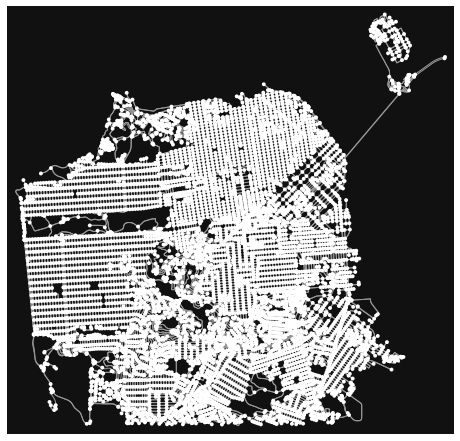

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [1]:
import osmnx as ox
G = ox.graph_from_place('San Francisco, California', network_type='drive')
ox.plot_graph(G)

In [2]:
import pandas as pd
import geopandas as gpd
import numpy as np
ox.save_graph_xml(G, filepath='./data/graph.osm')
gdf = ox.geometries.geometries_from_xml('./data/graph.osm')
gdf.crs = 'epsg:4326'
gdf

C:\Users\Daniel\.conda\envs\ox\lib\site-packages\osmnx\osm_xml.py:182: UserWarning: In order for save_graph_xml to behave properly the graph must have been created with the `all_oneway` setting set to True.
  warnings.warn(msg)


highway  \
element_type osmid                         
node         32927563                nan   
             32927591  motorway_junction   
             32927645  motorway_junction   
             33241803    traffic_signals   
             33242031                nan   
...                                  ...   
way          9995            residential   
             9996              secondary   
             9997              secondary   
             9998            residential   
             9999            residential   

                                                                geometry  \
element_type osmid                                                         
node         32927563                        POINT (-122.39094 37.78592)   
             32927591                        POINT (-122.42412 37.73135)   
             32927645                        POINT (-122.41326 37.73271)   
             33241803                        POINT (-122.40345 37.80504)   
             33242031                        POINT (-122.41648 37.79905)   
...                                                                  ...   
way          9995      LINESTRING (-122.46970 37.73479, -122.46989 37...   
             9996      LINESTRING (-122.46970 37.73479, -122.47051 37...   
             9997      LINESTRING (-122.46970 37.73479, -122.46882 37...   
             9998      LINESTRING (-122.46715 37.73491, -122.46703 37...   
             9999      LINESTRING (-122.46715 37.73491, -122.46731 37...   

                                       nodes lanes maxspeed  \
element_type osmid                                            
node         32927563                    NaN   NaN      NaN   
             32927591                    NaN   NaN      NaN   
             32927645                    NaN   NaN      NaN   
             33241803                    NaN   NaN      NaN   
             33242031                    NaN   NaN      NaN   
...                                      ...   ...      ...   
way          9995       [65314788, 65332476]   nan      nan   
             9996       [65314788, 65309866]     2      nan   
             9997       [65314788, 65291599]     2      nan   
             9998      [65314792, 258755842]   nan      nan   
             9999       [65314792, 65329950]   nan      nan   

                                          name oneway  
element_type osmid                                     
node         32927563                      NaN    NaN  
             32927591                      NaN    NaN  
             32927645                      NaN    NaN  
             33241803                      NaN    NaN  
             33242031                      NaN    NaN  
...                                        ...    ...  
way          9995             San Fernando Way     no  
             9996      Saint Francis Boulevard     no  
             9997      Saint Francis Boulevard     no  
             9998               San Benito Way     no  
             9999               San Benito Way     no  

[36510 rows x 7 columns]

In [3]:
gdf = gdf.reset_index()
gdf

,element_type,osmid,highway,geometry,nodes,lanes,maxspeed,name,oneway
0,node,32927563,nan,POINT (-122.39094 37.78592),NaN,NaN,NaN,NaN,NaN
1,node,32927591,motorway_junction,POINT (-122.42412 37.73135),NaN,NaN,NaN,NaN,NaN
2,node,32927645,motorway_junction,POINT (-122.41326 37.73271),NaN,NaN,NaN,NaN,NaN
3,node,33241803,traffic_signals,POINT (-122.40345 37.80504),NaN,NaN,NaN,NaN,NaN
4,node,33242031,nan,POINT (-122.41648 37.79905),NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
36505,way,9995,residential,"LINESTRING (-122.46970 37.73479, -122.46989 37...","[65314788, 65332476]",nan,nan,San Fernando Way,no
36506,way,9996,secondary,"LINESTRING (-122.46970 37.73479, -122.47051 37...","[65314788, 65309866]",2,nan,Saint Francis Boulevard,no
36507,way,9997,secondary,"LINESTRING (-122.46970 37.73479, -122.46882 37...","[65314788, 65291599]",2,nan,Saint Francis Boulevard,no
36508,way,9998,residential,"LINESTRING (-122.46715 37.73491, -122.46703 37...","[65314792, 258755842]",nan,nan,San Benito Way,no


In [4]:
# The dataset is divided to nodes and ways subsets

In [5]:
nodes = gdf.loc[gdf['element_type'] =='node']
nodes

,element_type,osmid,highway,geometry,nodes,lanes,maxspeed,name,oneway
0,node,32927563,nan,POINT (-122.39094 37.78592),NaN,NaN,NaN,NaN,NaN
1,node,32927591,motorway_junction,POINT (-122.42412 37.73135),NaN,NaN,NaN,NaN,NaN
2,node,32927645,motorway_junction,POINT (-122.41326 37.73271),NaN,NaN,NaN,NaN,NaN
3,node,33241803,traffic_signals,POINT (-122.40345 37.80504),NaN,NaN,NaN,NaN,NaN
4,node,33242031,nan,POINT (-122.41648 37.79905),NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
9653,node,9702068029,nan,POINT (-122.36967 37.81120),NaN,NaN,NaN,NaN,NaN
9654,node,9702068030,nan,POINT (-122.36764 37.81016),NaN,NaN,NaN,NaN,NaN
9655,node,9702068031,nan,POINT (-122.36752 37.80997),NaN,NaN,NaN,NaN,NaN
9656,node,9702068036,nan,POINT (-122.36740 37.81046),NaN,NaN,NaN,NaN,NaN


In [6]:
ways = gdf.loc[gdf['element_type'] =='way']
ways

,element_type,osmid,highway,geometry,nodes,lanes,maxspeed,name,oneway
9658,way,0,motorway,"LINESTRING (-122.39094 37.78592, -122.36717 37...","[32927563, 645559609]",5,50 mph,San Francisco – Oakland Bay Bridge,yes
9659,way,1,motorway_link,"LINESTRING (-122.42412 37.73135, -122.42036 37...","[32927591, 315706881]",1,nan,nan,yes
9660,way,10,residential,"LINESTRING (-122.39119 37.77058, -122.39123 37...","[54891208, 317126597]","['2', '3']",nan,4th Street,no
9661,way,100,residential,"LINESTRING (-122.46837 37.74708, -122.46850 37...","[65280050, 65280044]",2,nan,12th Avenue,no
9662,way,1000,residential,"LINESTRING (-122.42972 37.73504, -122.42944 37...","[65287934, 358887694]",nan,nan,Roanoke Street,no
...,...,...,...,...,...,...,...,...,...
36505,way,9995,residential,"LINESTRING (-122.46970 37.73479, -122.46989 37...","[65314788, 65332476]",nan,nan,San Fernando Way,no
36506,way,9996,secondary,"LINESTRING (-122.46970 37.73479, -122.47051 37...","[65314788, 65309866]",2,nan,Saint Francis Boulevard,no
36507,way,9997,secondary,"LINESTRING (-122.46970 37.73479, -122.46882 37...","[65314788, 65291599]",2,nan,Saint Francis Boulevard,no
36508,way,9998,residential,"LINESTRING (-122.46715 37.73491, -122.46703 37...","[65314792, 258755842]",nan,nan,San Benito Way,no


In [7]:
ways.drop(columns=['osmid'], inplace = True)

C:\Users\Daniel\AppData\Local\Temp\ipykernel_1240\326553285.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ways.drop(columns=['osmid'], inplace = True)


In [8]:
ways

,element_type,highway,geometry,nodes,lanes,maxspeed,name,oneway
9658,way,motorway,"LINESTRING (-122.39094 37.78592, -122.36717 37...","[32927563, 645559609]",5,50 mph,San Francisco – Oakland Bay Bridge,yes
9659,way,motorway_link,"LINESTRING (-122.42412 37.73135, -122.42036 37...","[32927591, 315706881]",1,nan,nan,yes
9660,way,residential,"LINESTRING (-122.39119 37.77058, -122.39123 37...","[54891208, 317126597]","['2', '3']",nan,4th Street,no
9661,way,residential,"LINESTRING (-122.46837 37.74708, -122.46850 37...","[65280050, 65280044]",2,nan,12th Avenue,no
9662,way,residential,"LINESTRING (-122.42972 37.73504, -122.42944 37...","[65287934, 358887694]",nan,nan,Roanoke Street,no
...,...,...,...,...,...,...,...,...
36505,way,residential,"LINESTRING (-122.46970 37.73479, -122.46989 37...","[65314788, 65332476]",nan,nan,San Fernando Way,no
36506,way,secondary,"LINESTRING (-122.46970 37.73479, -122.47051 37...","[65314788, 65309866]",2,nan,Saint Francis Boulevard,no
36507,way,secondary,"LINESTRING (-122.46970 37.73479, -122.46882 37...","[65314788, 65291599]",2,nan,Saint Francis Boulevard,no
36508,way,residential,"LINESTRING (-122.46715 37.73491, -122.46703 37...","[65314792, 258755842]",nan,nan,San Benito Way,no


In [10]:
#ways.drop(columns=['index'], inplace = True)
#ways

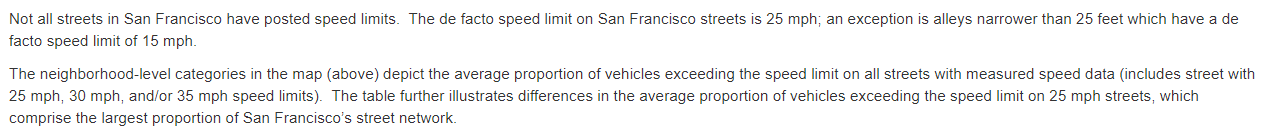

In [11]:
# set default speed limit

In [12]:
ways['maxspeed'].replace({'nan':'25 mph'}, inplace=True)
ways

C:\Users\Daniel\AppData\Local\Temp\ipykernel_1240\816331789.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ways['maxspeed'].replace({'nan':'25 mph'}, inplace=True)


,element_type,highway,geometry,nodes,lanes,maxspeed,name,oneway
9658,way,motorway,"LINESTRING (-122.39094 37.78592, -122.36717 37...","[32927563, 645559609]",5,50 mph,San Francisco – Oakland Bay Bridge,yes
9659,way,motorway_link,"LINESTRING (-122.42412 37.73135, -122.42036 37...","[32927591, 315706881]",1,25 mph,nan,yes
9660,way,residential,"LINESTRING (-122.39119 37.77058, -122.39123 37...","[54891208, 317126597]","['2', '3']",25 mph,4th Street,no
9661,way,residential,"LINESTRING (-122.46837 37.74708, -122.46850 37...","[65280050, 65280044]",2,25 mph,12th Avenue,no
9662,way,residential,"LINESTRING (-122.42972 37.73504, -122.42944 37...","[65287934, 358887694]",nan,25 mph,Roanoke Street,no
...,...,...,...,...,...,...,...,...
36505,way,residential,"LINESTRING (-122.46970 37.73479, -122.46989 37...","[65314788, 65332476]",nan,25 mph,San Fernando Way,no
36506,way,secondary,"LINESTRING (-122.46970 37.73479, -122.47051 37...","[65314788, 65309866]",2,25 mph,Saint Francis Boulevard,no
36507,way,secondary,"LINESTRING (-122.46970 37.73479, -122.46882 37...","[65314788, 65291599]",2,25 mph,Saint Francis Boulevard,no
36508,way,residential,"LINESTRING (-122.46715 37.73491, -122.46703 37...","[65314792, 258755842]",nan,25 mph,San Benito Way,no


In [13]:
# speed limit to int

In [14]:
ways['maxspeed'] = ways.maxspeed.str.extract('(\d+)')
ways['maxspeed'] = ways['maxspeed'].astype(int)

<>:1: DeprecationWarning: invalid escape sequence '\d'
<>:1: DeprecationWarning: invalid escape sequence '\d'
C:\Users\Daniel\AppData\Local\Temp\ipykernel_1240\3455433062.py:1: DeprecationWarning: invalid escape sequence '\d'
  ways['maxspeed'] = ways.maxspeed.str.extract('(\d+)')
C:\Users\Daniel\.conda\envs\ox\lib\site-packages\geopandas\geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [15]:
ways

,element_type,highway,geometry,nodes,lanes,maxspeed,name,oneway
9658,way,motorway,"LINESTRING (-122.39094 37.78592, -122.36717 37...","[32927563, 645559609]",5,50,San Francisco – Oakland Bay Bridge,yes
9659,way,motorway_link,"LINESTRING (-122.42412 37.73135, -122.42036 37...","[32927591, 315706881]",1,25,nan,yes
9660,way,residential,"LINESTRING (-122.39119 37.77058, -122.39123 37...","[54891208, 317126597]","['2', '3']",25,4th Street,no
9661,way,residential,"LINESTRING (-122.46837 37.74708, -122.46850 37...","[65280050, 65280044]",2,25,12th Avenue,no
9662,way,residential,"LINESTRING (-122.42972 37.73504, -122.42944 37...","[65287934, 358887694]",nan,25,Roanoke Street,no
...,...,...,...,...,...,...,...,...
36505,way,residential,"LINESTRING (-122.46970 37.73479, -122.46989 37...","[65314788, 65332476]",nan,25,San Fernando Way,no
36506,way,secondary,"LINESTRING (-122.46970 37.73479, -122.47051 37...","[65314788, 65309866]",2,25,Saint Francis Boulevard,no
36507,way,secondary,"LINESTRING (-122.46970 37.73479, -122.46882 37...","[65314788, 65291599]",2,25,Saint Francis Boulevard,no
36508,way,residential,"LINESTRING (-122.46715 37.73491, -122.46703 37...","[65314792, 258755842]",nan,25,San Benito Way,no


In [16]:
#one hot

In [17]:
dummies = pd.get_dummies(ways['oneway'],prefix="oneway")

In [18]:
ways.drop(columns=['oneway'], inplace = True)

C:\Users\Daniel\AppData\Local\Temp\ipykernel_1240\4134575821.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ways.drop(columns=['oneway'], inplace = True)


In [19]:
ways = ways.join(dummies)

In [20]:
ways

,element_type,highway,geometry,nodes,lanes,maxspeed,name,oneway_no,oneway_yes
9658,way,motorway,"LINESTRING (-122.39094 37.78592, -122.36717 37...","[32927563, 645559609]",5,50,San Francisco – Oakland Bay Bridge,0,1
9659,way,motorway_link,"LINESTRING (-122.42412 37.73135, -122.42036 37...","[32927591, 315706881]",1,25,nan,0,1
9660,way,residential,"LINESTRING (-122.39119 37.77058, -122.39123 37...","[54891208, 317126597]","['2', '3']",25,4th Street,1,0
9661,way,residential,"LINESTRING (-122.46837 37.74708, -122.46850 37...","[65280050, 65280044]",2,25,12th Avenue,1,0
9662,way,residential,"LINESTRING (-122.42972 37.73504, -122.42944 37...","[65287934, 358887694]",nan,25,Roanoke Street,1,0
...,...,...,...,...,...,...,...,...,...
36505,way,residential,"LINESTRING (-122.46970 37.73479, -122.46989 37...","[65314788, 65332476]",nan,25,San Fernando Way,1,0
36506,way,secondary,"LINESTRING (-122.46970 37.73479, -122.47051 37...","[65314788, 65309866]",2,25,Saint Francis Boulevard,1,0
36507,way,secondary,"LINESTRING (-122.46970 37.73479, -122.46882 37...","[65314788, 65291599]",2,25,Saint Francis Boulevard,1,0
36508,way,residential,"LINESTRING (-122.46715 37.73491, -122.46703 37...","[65314792, 258755842]",nan,25,San Benito Way,1,0


In [21]:
# SanFranciscoSpeedLimitCompliance

In [22]:
df = pd.read_csv('./data/SanFranciscoSpeedLimitCompliance.csv')
from shapely import wkt
df['the_geom'] = df['the_geom'].apply(wkt.loads)
gdfSpeed = gpd.GeoDataFrame(df, crs='epsg:4326')

C:\Users\Daniel\AppData\Local\Temp\ipykernel_1240\2503447945.py:4: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  gdfSpeed = gpd.GeoDataFrame(df, crs='epsg:4326')


In [23]:
gdfSpeed

,CNN,the_geom,SpeedLimit,STREETNAME,Over_pct,O5mph_pct,Speed_avg,SpeedO_avg,Spd5O_avg
0,6709000,LINESTRING (-122.39031948388298 37.78813450234...,30,HARRISON ST,39.77,11.11,28.40,33.76,38.32
1,6710000,LINESTRING (-122.39117965804613 37.78745518697...,30,HARRISON ST,39.77,11.11,28.40,33.76,38.32
2,6719000,LINESTRING (-122.39961623244395 37.78079148306...,30,HARRISON ST,48.00,15.00,29.55,33.88,38.00
3,194101,LINESTRING (-122.38775628064698 37.75283561191...,30,3RD ST,58.50,25.50,31.26,34.89,38.63
4,194201,LINESTRING (-122.38775628064698 37.75283561191...,30,3RD ST,58.50,25.50,31.26,34.89,38.63
...,...,...,...,...,...,...,...,...,...
608,409000,LINESTRING (-122.41160611273487 37.77622135626...,30,8TH ST,16.00,1.00,26.20,32.31,37.00
609,410000,LINESTRING (-122.41106944267237 37.77579380416...,30,8TH ST,16.00,1.00,26.20,32.31,37.00
610,411000,LINESTRING (-122.41061072931767 37.77542835163...,30,8TH ST,16.00,1.00,26.20,32.31,37.00
611,415000,LINESTRING (-122.40851633075071 37.77375969975...,30,8TH ST,18.00,0.00,25.10,32.00,0.00


In [24]:
# drop CNN column

In [25]:
gdfSpeed.drop(columns=['CNN'], inplace = True)
gdfSpeed

,the_geom,SpeedLimit,STREETNAME,Over_pct,O5mph_pct,Speed_avg,SpeedO_avg,Spd5O_avg
0,LINESTRING (-122.39031948388298 37.78813450234...,30,HARRISON ST,39.77,11.11,28.40,33.76,38.32
1,LINESTRING (-122.39117965804613 37.78745518697...,30,HARRISON ST,39.77,11.11,28.40,33.76,38.32
2,LINESTRING (-122.39961623244395 37.78079148306...,30,HARRISON ST,48.00,15.00,29.55,33.88,38.00
3,LINESTRING (-122.38775628064698 37.75283561191...,30,3RD ST,58.50,25.50,31.26,34.89,38.63
4,LINESTRING (-122.38775628064698 37.75283561191...,30,3RD ST,58.50,25.50,31.26,34.89,38.63
...,...,...,...,...,...,...,...,...
608,LINESTRING (-122.41160611273487 37.77622135626...,30,8TH ST,16.00,1.00,26.20,32.31,37.00
609,LINESTRING (-122.41106944267237 37.77579380416...,30,8TH ST,16.00,1.00,26.20,32.31,37.00
610,LINESTRING (-122.41061072931767 37.77542835163...,30,8TH ST,16.00,1.00,26.20,32.31,37.00
611,LINESTRING (-122.40851633075071 37.77375969975...,30,8TH ST,18.00,0.00,25.10,32.00,0.00


In [26]:
gdfSpeed['SpeedLimit'].replace({0:25}, inplace=True)

In [27]:
gdfSpeed = gdfSpeed.rename(columns ={'the_geom':'geometry'})

In [28]:
gdfSpeed

,geometry,SpeedLimit,STREETNAME,Over_pct,O5mph_pct,Speed_avg,SpeedO_avg,Spd5O_avg
0,"LINESTRING (-122.39032 37.78813, -122.39118 37...",30,HARRISON ST,39.77,11.11,28.40,33.76,38.32
1,"LINESTRING (-122.39118 37.78746, -122.39205 37...",30,HARRISON ST,39.77,11.11,28.40,33.76,38.32
2,"LINESTRING (-122.39962 37.78079, -122.40184 37...",30,HARRISON ST,48.00,15.00,29.55,33.88,38.00
3,"LINESTRING (-122.38776 37.75284, -122.38768 37...",30,3RD ST,58.50,25.50,31.26,34.89,38.63
4,"LINESTRING (-122.38776 37.75284, -122.38782 37...",30,3RD ST,58.50,25.50,31.26,34.89,38.63
...,...,...,...,...,...,...,...,...
608,"LINESTRING (-122.41161 37.77622, -122.41107 37...",30,8TH ST,16.00,1.00,26.20,32.31,37.00
609,"LINESTRING (-122.41107 37.77579, -122.41061 37...",30,8TH ST,16.00,1.00,26.20,32.31,37.00
610,"LINESTRING (-122.41061 37.77543, -122.41006 37...",30,8TH ST,16.00,1.00,26.20,32.31,37.00
611,"LINESTRING (-122.40852 37.77376, -122.40843 37...",30,8TH ST,18.00,0.00,25.10,32.00,0.00


In [29]:
#join two sets

In [30]:
result = gdfSpeed.sjoin(ways, how="inner", predicate='intersects')

In [31]:
result

,geometry,SpeedLimit,STREETNAME,Over_pct,O5mph_pct,Speed_avg,SpeedO_avg,Spd5O_avg,index_right,element_type,highway,nodes,lanes,maxspeed,name,oneway_no,oneway_yes
1,"LINESTRING (-122.39118 37.78746, -122.39205 37...",30,HARRISON ST,39.77,11.11,28.40,33.76,38.32,23822,way,residential,"[890045131, 65290185]","['2', '3']",25,Beale Street,1,0
1,"LINESTRING (-122.39118 37.78746, -122.39205 37...",30,HARRISON ST,39.77,11.11,28.40,33.76,38.32,17609,way,residential,"[65290185, 890045131]","['2', '3']",25,Beale Street,1,0
2,"LINESTRING (-122.39962 37.78079, -122.40184 37...",30,HARRISON ST,48.00,15.00,29.55,33.88,38.00,29449,way,secondary,"[65282779, 65335256]","['2', '3']",25,4th Street,0,1
2,"LINESTRING (-122.39962 37.78079, -122.40184 37...",30,HARRISON ST,48.00,15.00,29.55,33.88,38.00,29427,way,secondary,"[65282779, 9680491479]",1,25,4th Street,0,1
28,"LINESTRING (-122.39962 37.78079, -122.39908 37...",25,4TH ST,69.00,32.00,27.35,30.12,33.72,29427,way,secondary,"[65282779, 9680491479]",1,25,4th Street,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,"LINESTRING (-122.41161 37.77622, -122.41107 37...",30,8TH ST,16.00,1.00,26.20,32.31,37.00,33620,way,secondary,"[65306822, 65306827]",3,25,Howard Street,0,1
610,"LINESTRING (-122.41061 37.77543, -122.41006 37...",30,8TH ST,16.00,1.00,26.20,32.31,37.00,10535,way,secondary,"[65317565, 65317560]",3,25,Folsom Street,0,1
611,"LINESTRING (-122.40852 37.77376, -122.40843 37...",30,8TH ST,18.00,0.00,25.10,32.00,0.00,31604,way,motorway_link,"[65286148, 65286864]","['2', '3']",50,nan,0,1
612,"LINESTRING (-122.40542 37.77130, -122.40388 37...",30,8TH ST,9.95,0.00,24.16,32.00,0.00,24896,way,tertiary,"[2304626301, 2304626336]",nan,25,nan,0,1


In [32]:
result.drop(columns=['index_right'], inplace = True)

In [33]:
result

,geometry,SpeedLimit,STREETNAME,Over_pct,O5mph_pct,Speed_avg,SpeedO_avg,Spd5O_avg,element_type,highway,nodes,lanes,maxspeed,name,oneway_no,oneway_yes
1,"LINESTRING (-122.39118 37.78746, -122.39205 37...",30,HARRISON ST,39.77,11.11,28.40,33.76,38.32,way,residential,"[890045131, 65290185]","['2', '3']",25,Beale Street,1,0
1,"LINESTRING (-122.39118 37.78746, -122.39205 37...",30,HARRISON ST,39.77,11.11,28.40,33.76,38.32,way,residential,"[65290185, 890045131]","['2', '3']",25,Beale Street,1,0
2,"LINESTRING (-122.39962 37.78079, -122.40184 37...",30,HARRISON ST,48.00,15.00,29.55,33.88,38.00,way,secondary,"[65282779, 65335256]","['2', '3']",25,4th Street,0,1
2,"LINESTRING (-122.39962 37.78079, -122.40184 37...",30,HARRISON ST,48.00,15.00,29.55,33.88,38.00,way,secondary,"[65282779, 9680491479]",1,25,4th Street,0,1
28,"LINESTRING (-122.39962 37.78079, -122.39908 37...",25,4TH ST,69.00,32.00,27.35,30.12,33.72,way,secondary,"[65282779, 9680491479]",1,25,4th Street,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,"LINESTRING (-122.41161 37.77622, -122.41107 37...",30,8TH ST,16.00,1.00,26.20,32.31,37.00,way,secondary,"[65306822, 65306827]",3,25,Howard Street,0,1
610,"LINESTRING (-122.41061 37.77543, -122.41006 37...",30,8TH ST,16.00,1.00,26.20,32.31,37.00,way,secondary,"[65317565, 65317560]",3,25,Folsom Street,0,1
611,"LINESTRING (-122.40852 37.77376, -122.40843 37...",30,8TH ST,18.00,0.00,25.10,32.00,0.00,way,motorway_link,"[65286148, 65286864]","['2', '3']",50,nan,0,1
612,"LINESTRING (-122.40542 37.77130, -122.40388 37...",30,8TH ST,9.95,0.00,24.16,32.00,0.00,way,tertiary,"[2304626301, 2304626336]",nan,25,nan,0,1


C:\Users\Daniel\.conda\envs\ox\lib\site-packages\geopandas\plotting.py:74: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if mpl >= LooseVersion("3.4") or (mpl > LooseVersion("3.3.2") and "+" in mpl):
C:\Users\Daniel\.conda\envs\ox\lib\site-packages\setuptools\_distutils\version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


<AxesSubplot:>

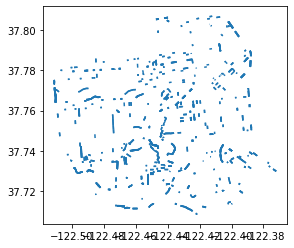

In [34]:
result.plot()

In [ ]:
ox.save_graph_xml(G, filepath='./data/result.osm')